<a href="https://colab.research.google.com/github/Adham-Osama11/object-detection-using-custom-dataset-with-yolov8/blob/main/Train_yolov8_object_detection_on_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Before you start



In [ ]:
!nvidia-smi

Tue Mar 12 18:15:04 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8



In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

##Custom DataSet

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="PTCNQXxLBfnvryFg5ePE")
project = rf.workspace("my-workspace-j6ggb").project("slash")
version = project.version(1)
dataset = version.download("yolov8")


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			    PR_curve.png      train_batch45.jpg
confusion_matrix.png				    R_curve.png       train_batch46.jpg
events.out.tfevents.1710267810.6d1601f2ac45.2532.0  results.csv       train_batch47.jpg
F1_curve.png					    results.png       val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					    train_batch1.jpg  weights


/content


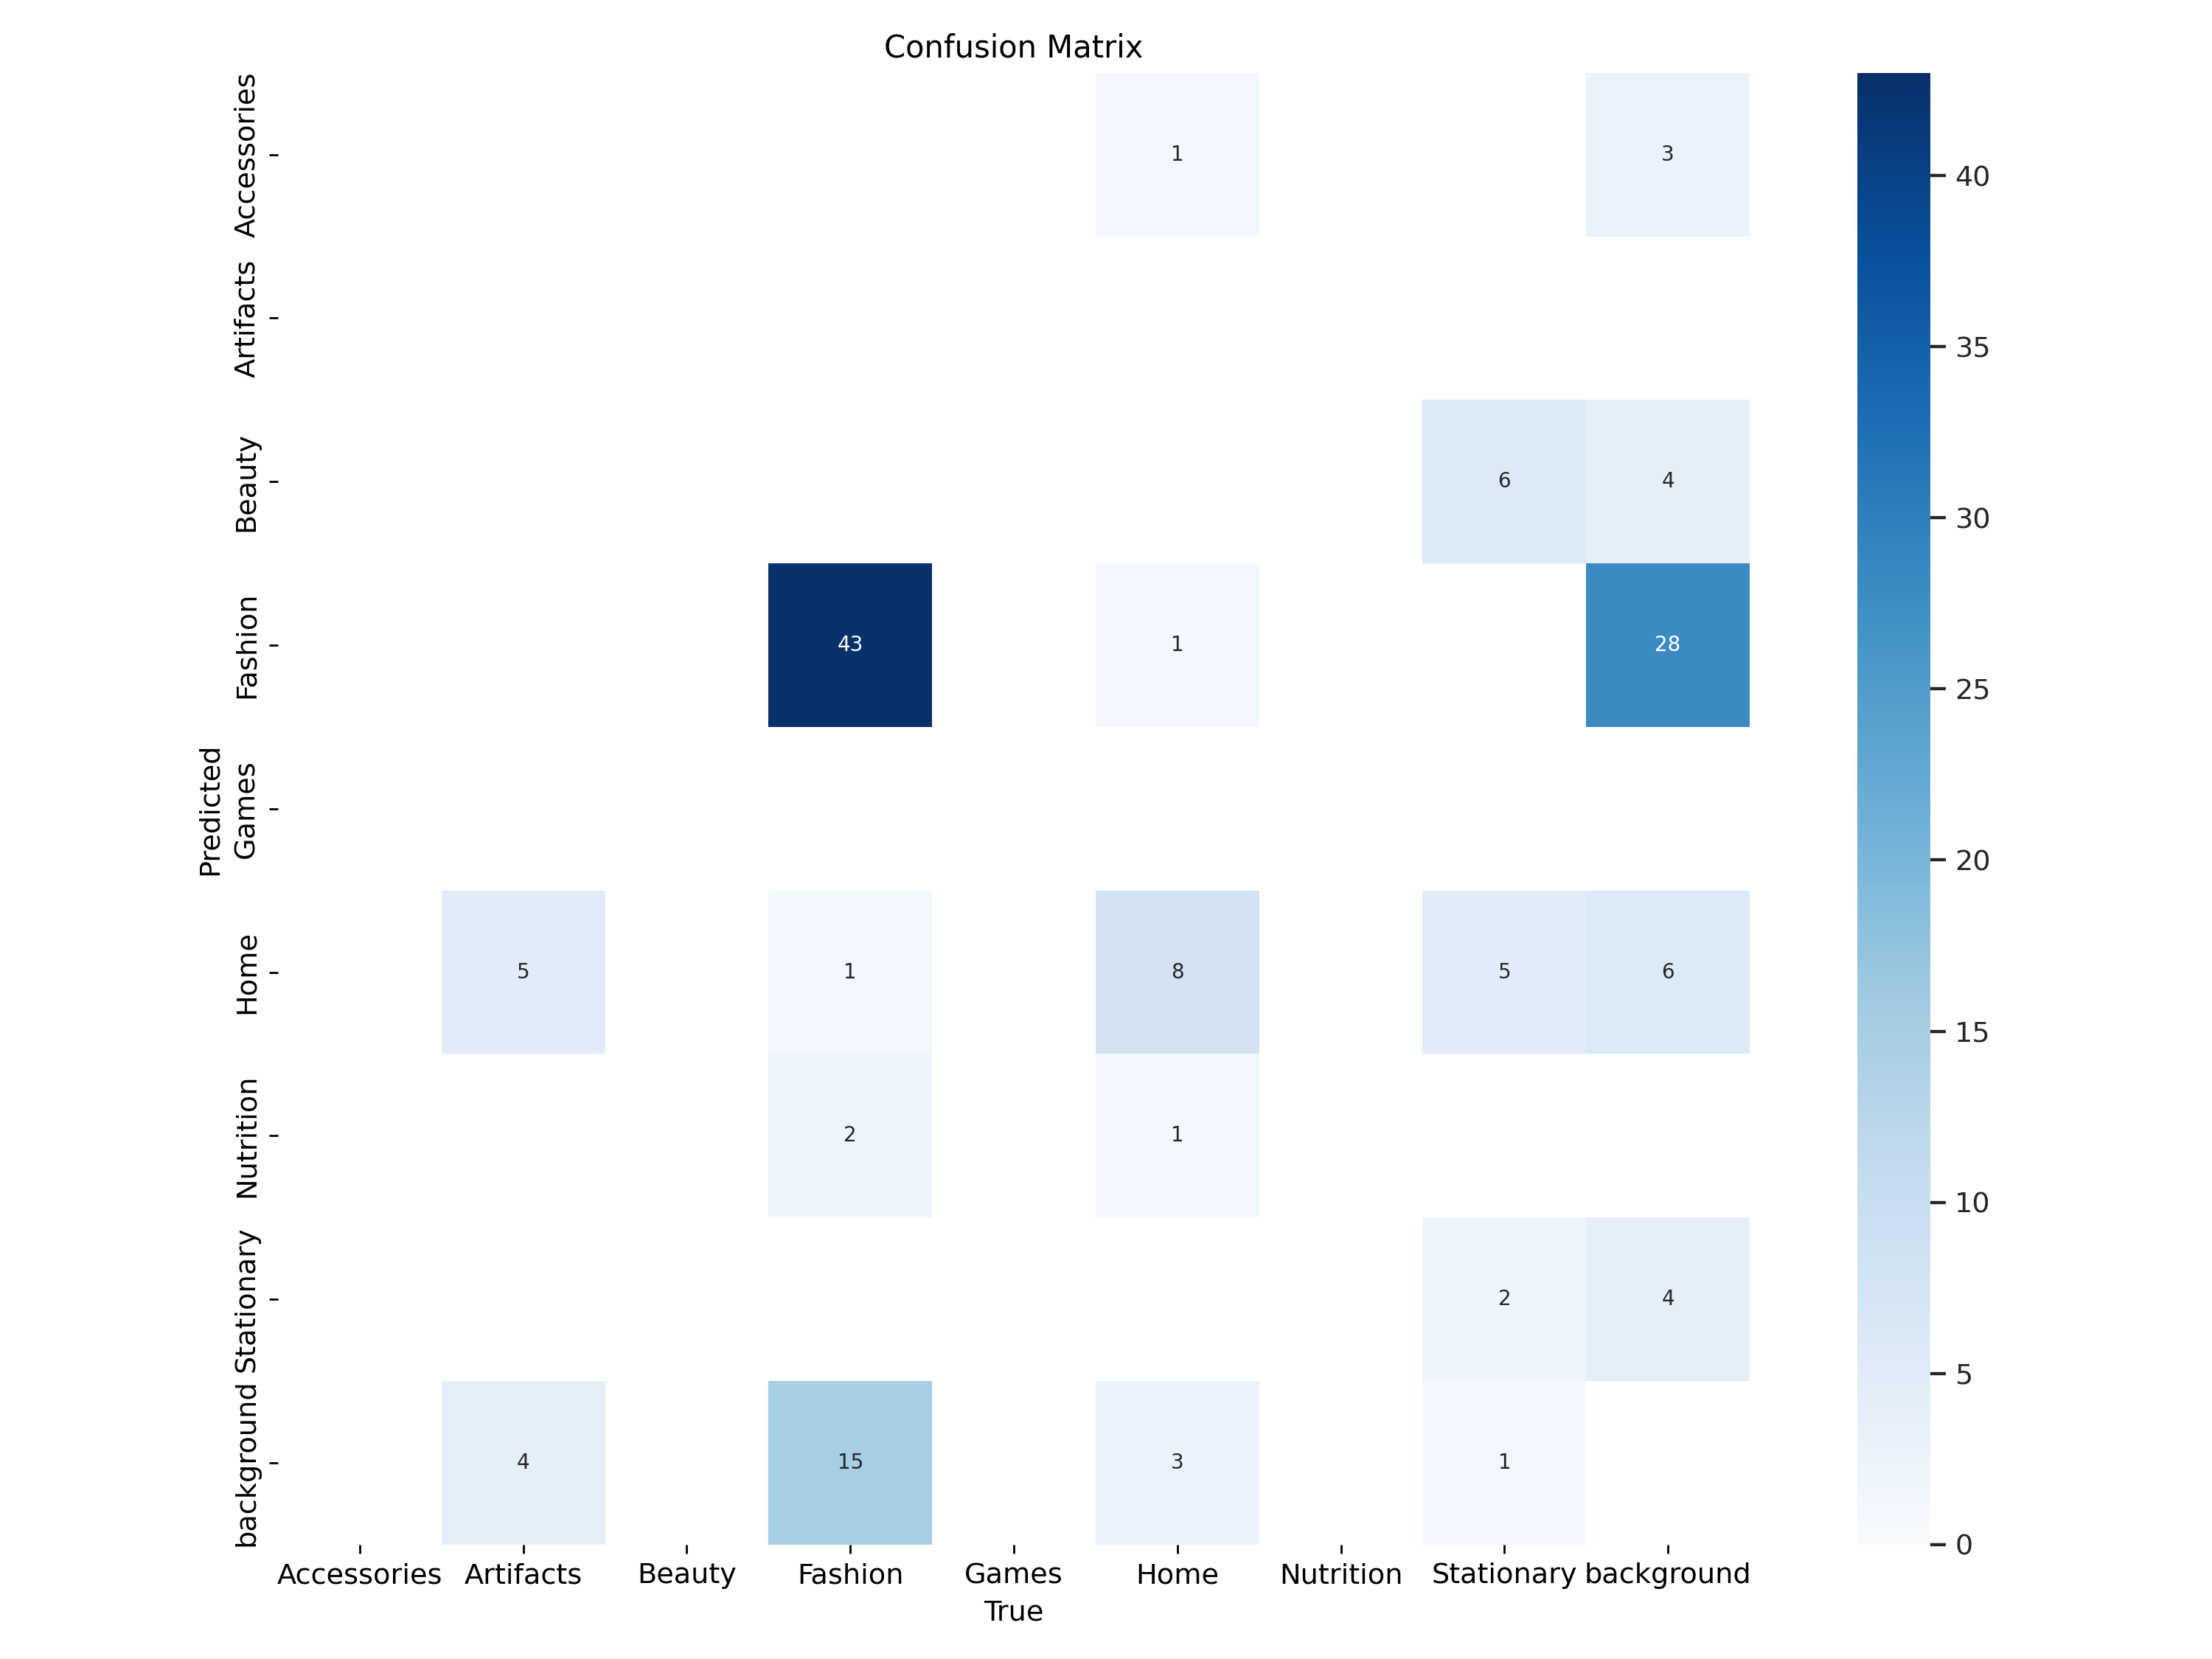

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


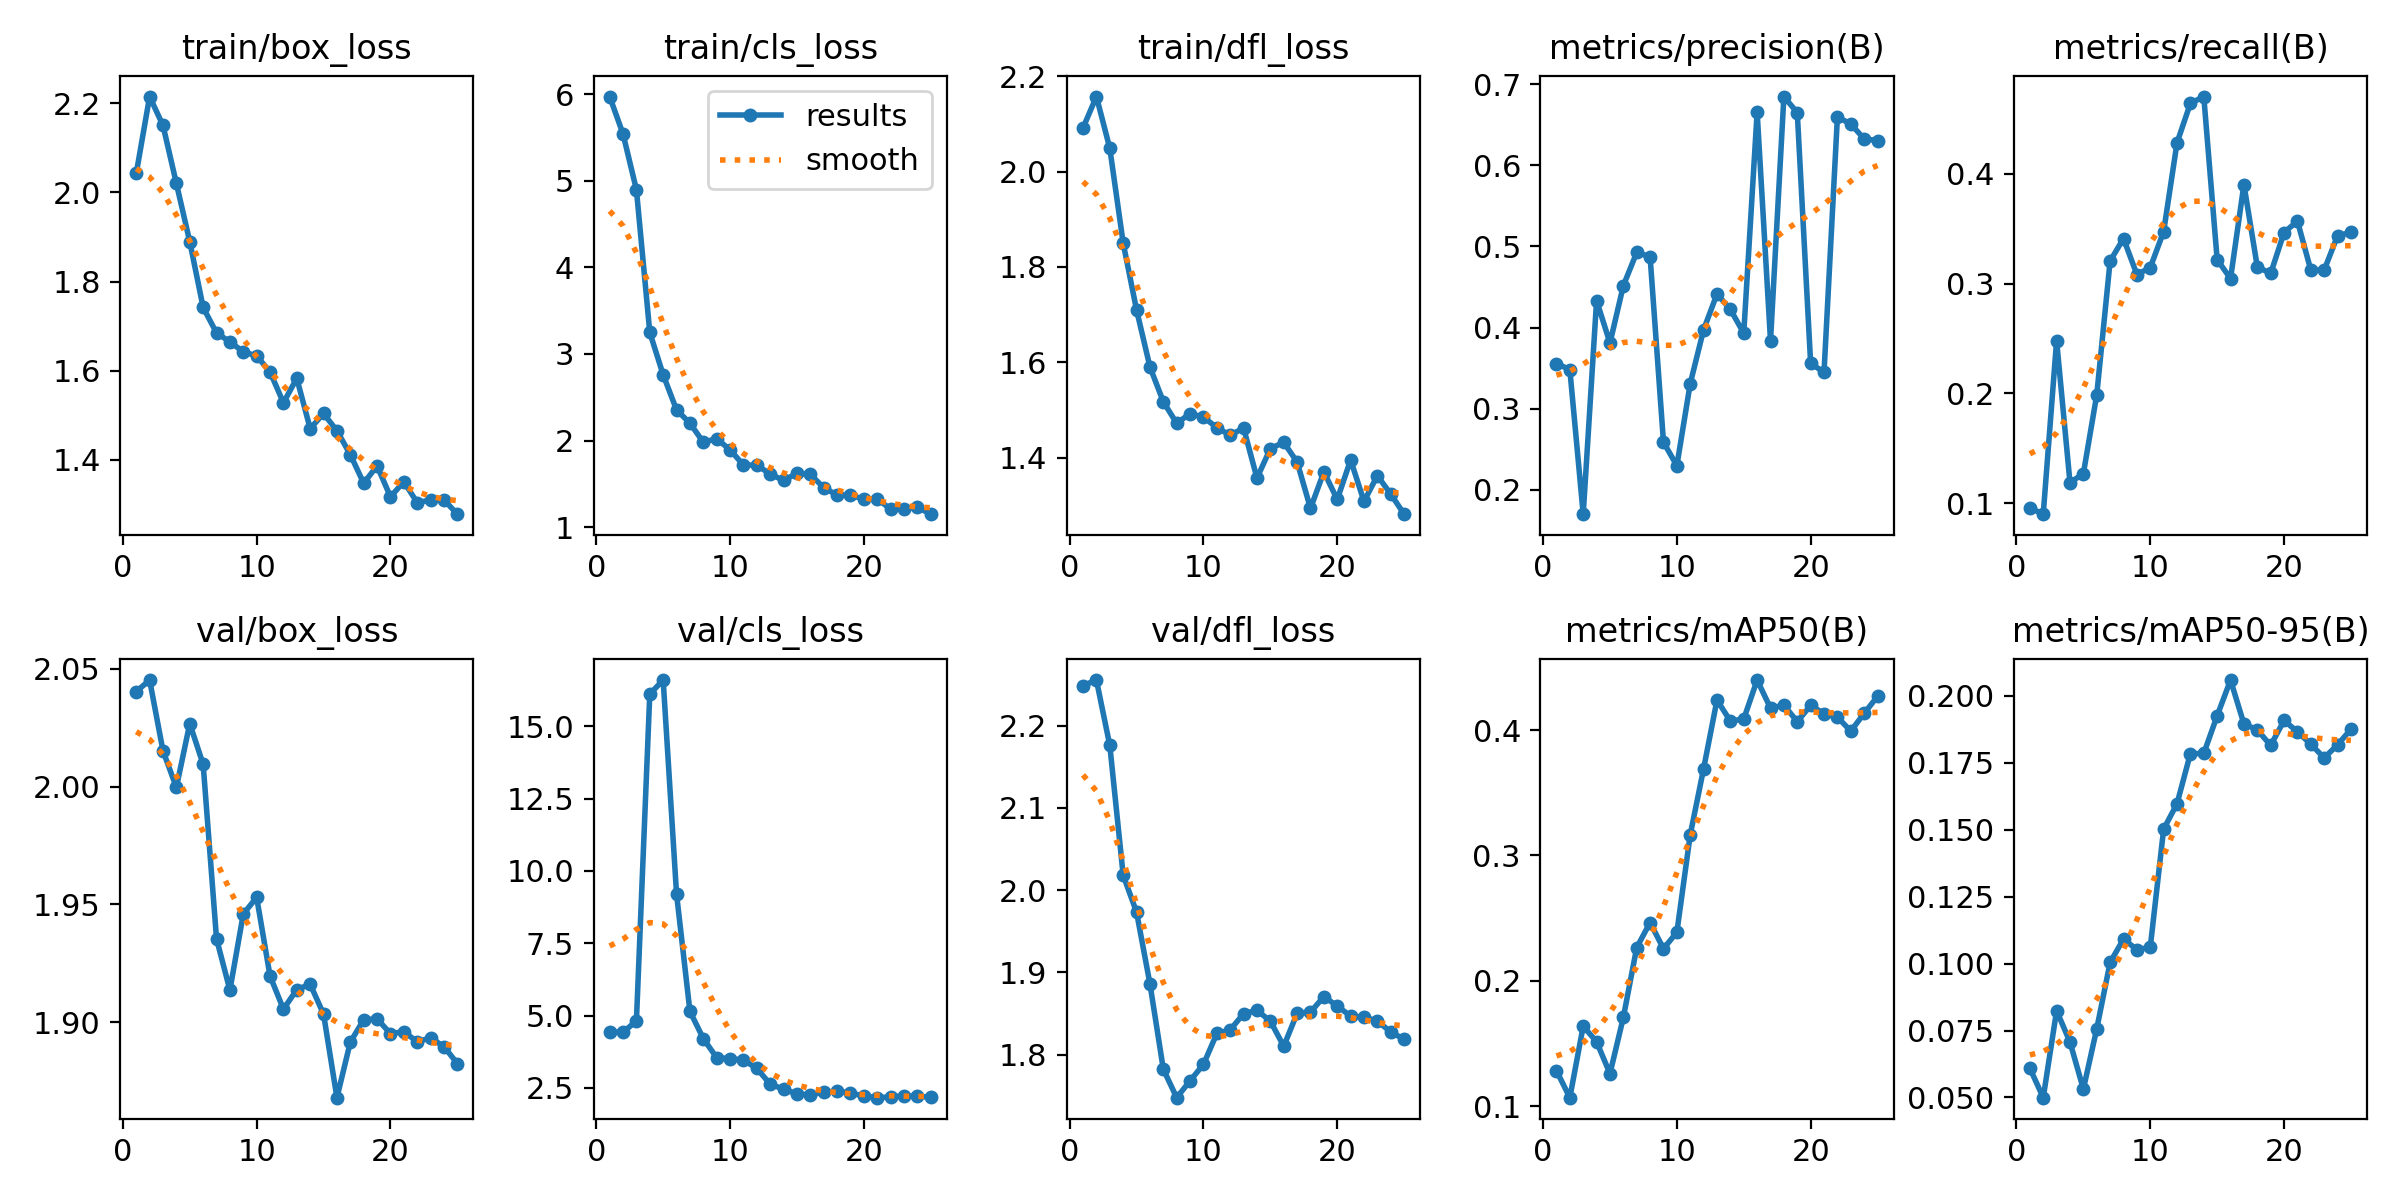

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


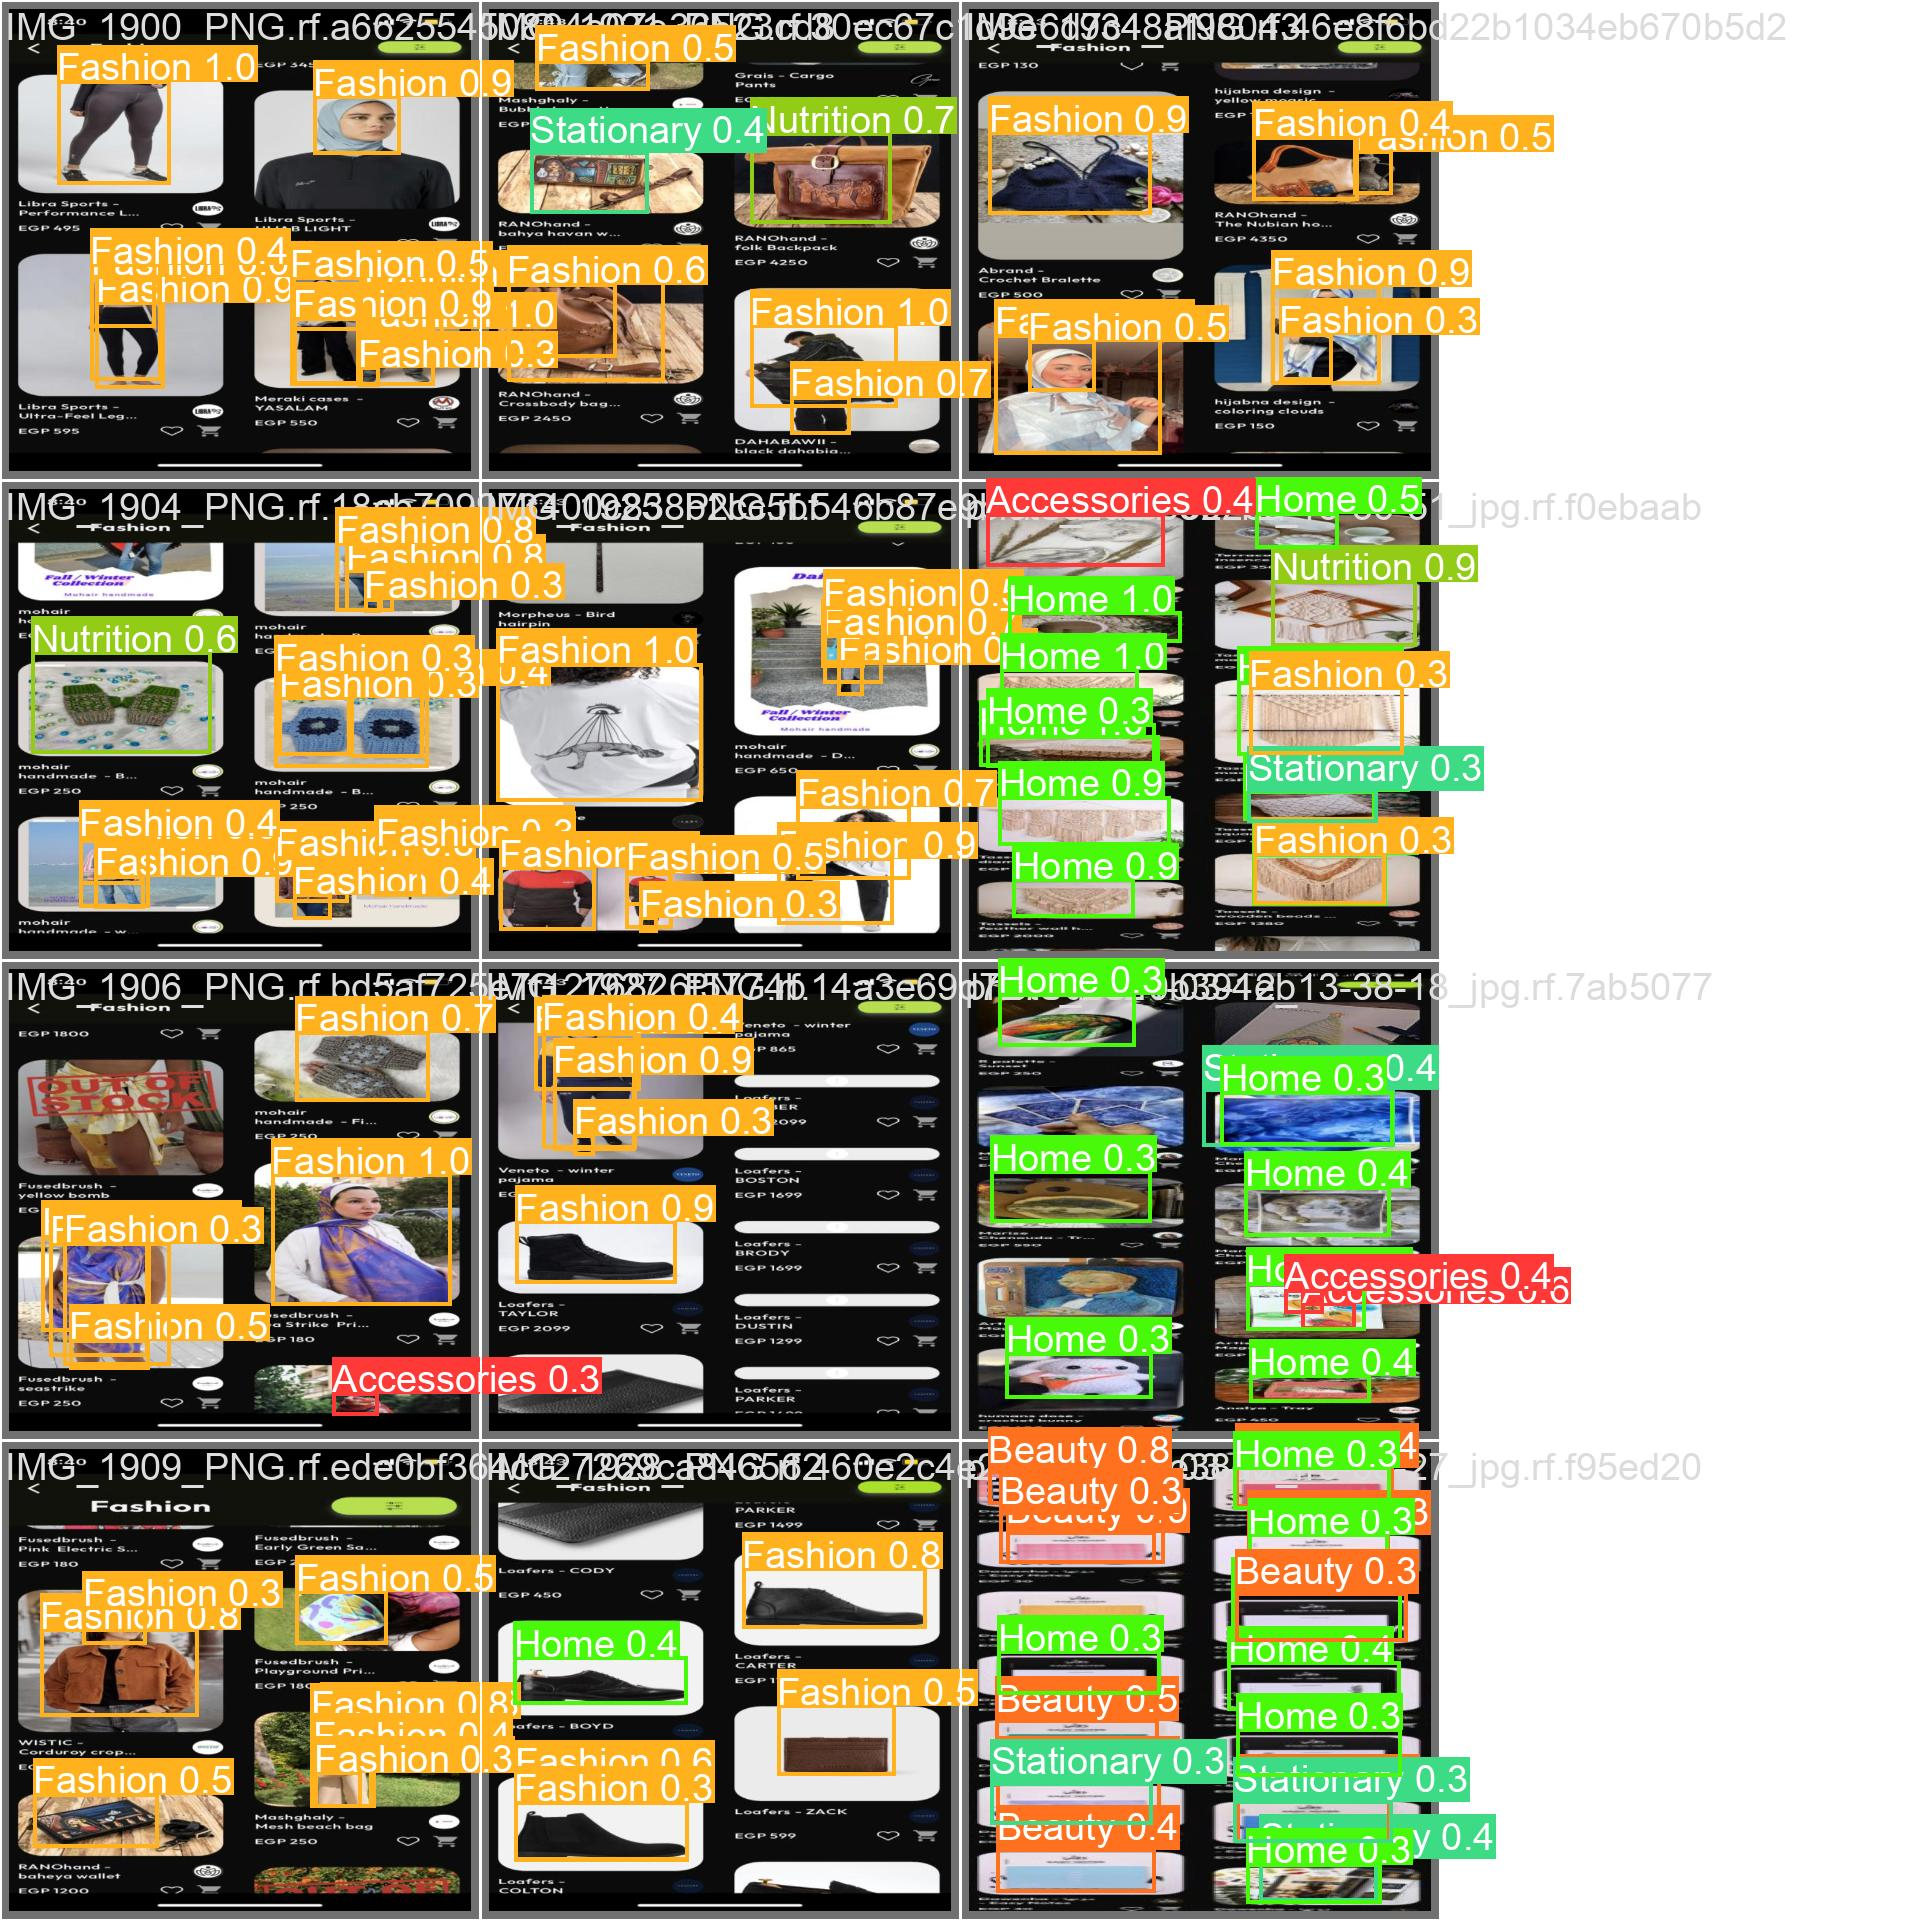

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/slash-1/valid/labels.cache... 12 images, 0 backgrounds, 0 corrupt: 100% 12/12 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.47s/it]
                   all         12         98      0.665        0.3       0.44      0.207
             Artifacts         12          9          0          0          0          0
               Fashion         12         61      0.761      0.574      0.736       0.34
                  Home         12         14      0.898      0.628      0.685      0.387
            Stationary         12         14          1          0       0.34      0.102
Speed: 0.3ms preprocess, 27.4ms inference, 0.0ms loss, 74.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn m

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/6 /content/datasets/slash-1/test/images/IMG_1897_PNG.rf.1c0fc9f7f3b812da8a1300aaaf6aa985.jpg: 800x800 4 Fashions, 1 Nutrition, 28.9ms
image 2/6 /content/datasets/slash-1/test/images/IMG_1905_PNG.rf.e945a2a6ef3e3514e515604460aeee4a.jpg: 800x800 10 Fashions, 2 Homes, 1 Nutrition, 22.6ms
image 3/6 /content/datasets/slash-1/test/images/photo_2024-03-12_13-32-33_jpg.rf.1e831571e47aa35d8b41fdcf75bd913a.jpg: 800x800 2 Accessoriess, 6 Beautys, 4 Homes, 1 Nutrition, 1 Stationary, 22.5ms
image 4/6 /content/datasets/slash-1/test/images/photo_2024-03-12_13-37-08_jpg.rf.77154bba83fc06ebc329e486cbe43048.jpg: 800x800 1 Accessories, 1 Beauty, 1 Fashion, 1 Home, 3 Nutritions, 1 Stationary, 22.5ms
image 5/6 /content/datasets/slash-1/test/images/photo_2024-03-12_13-38-14_jpg.rf.6

**NOTE:** Let's take a look at few results.

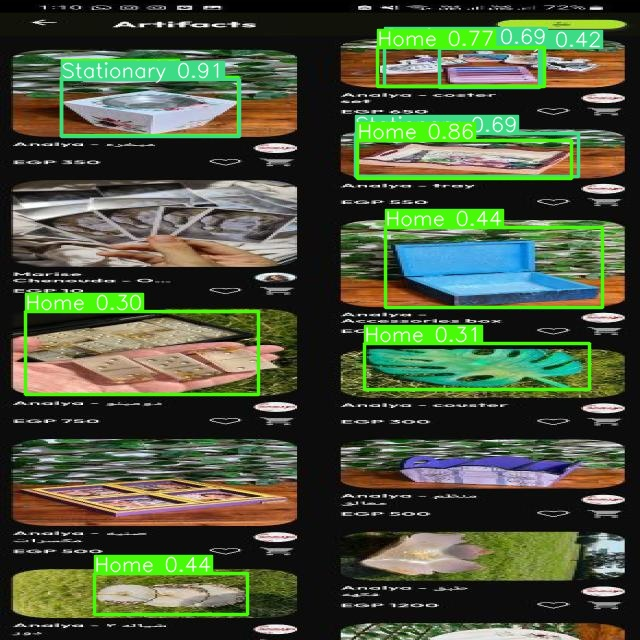

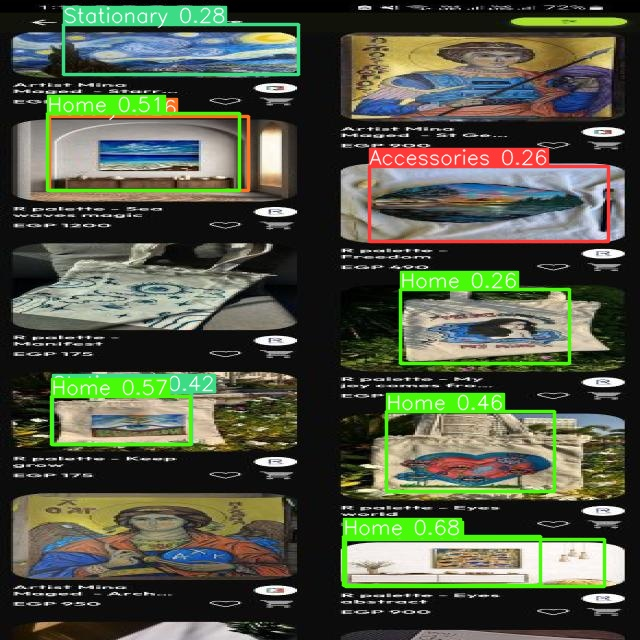

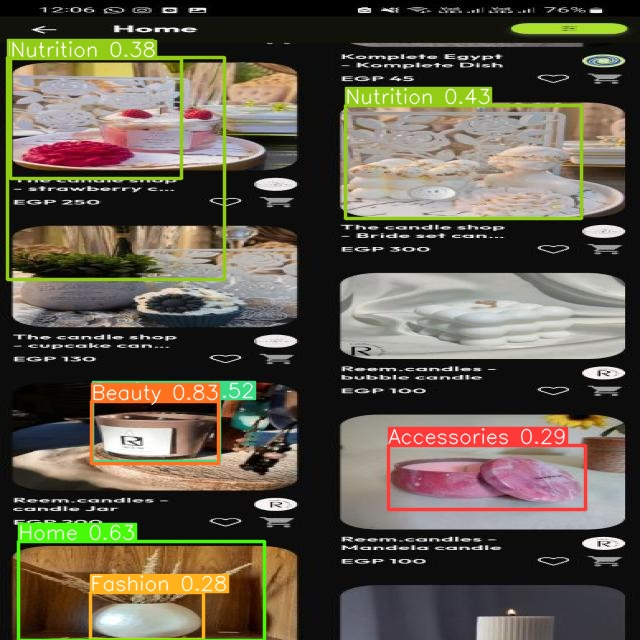

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")